In [2134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
#warnings.filterwarnings('ignore')
pd.set_option("future.no_silent_downcasting", True)

seed = 1234
np.random.seed(seed)  

In [2136]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income"]

# Read train data 
train_df = pd.read_csv("adult/adult.data", names=columns, sep=",", header=None)

# test data 
test_df = pd.read_csv("adult/adult.test", names=columns, sep=",", header=None, skiprows=1)

# Replace ` ?` with `NaN`
train_df.replace(' ?', np.nan, inplace=True)
test_df.replace(' ?', np.nan, inplace=True)

In [2137]:
print(train_df.shape)
train_df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2140]:
# print(test_df.shape)
# test_df.head()

In [2142]:
# train_df.info();

In [2144]:
# Summary statistics for numerical columns
# print(train_df.describe());

## EDA

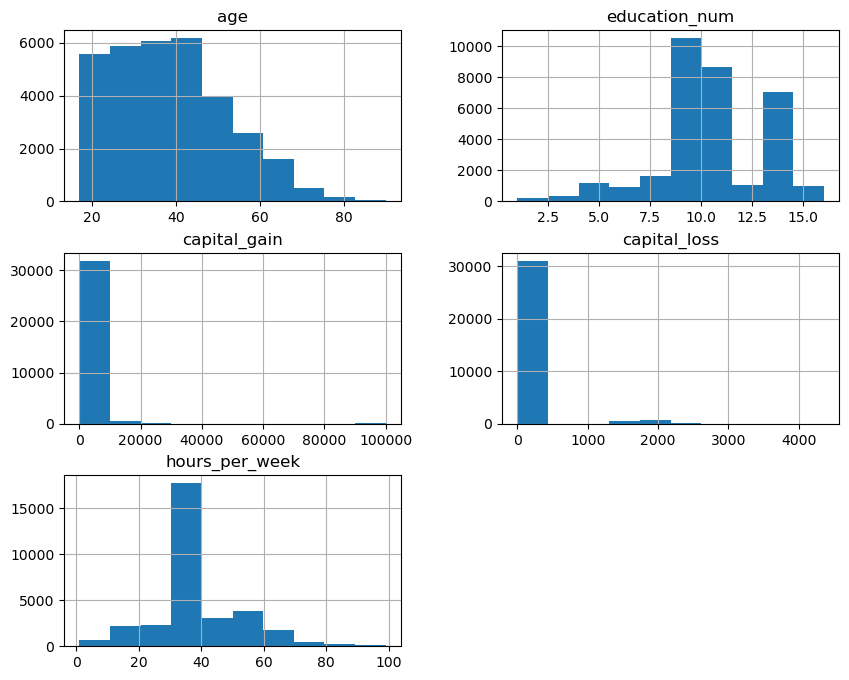

In [2147]:
# Histogram
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
train_df[numerical_features].hist(figsize=(10, 8));

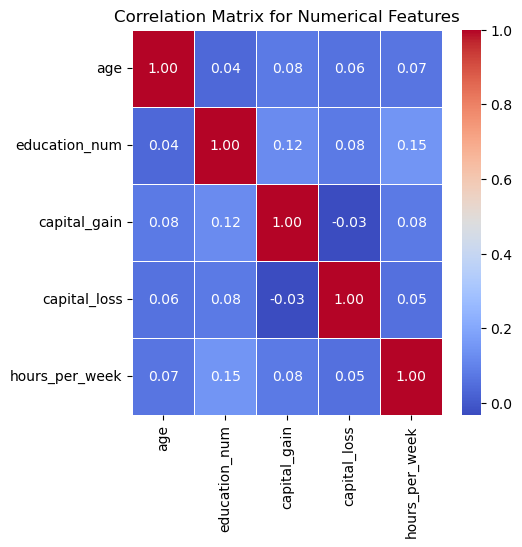

In [2148]:
# CORRELATION MATRIX /HEATMAP
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#  correlation matrix
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [2149]:
# ANALYSIS ????

### preprocessing

In [2154]:
# number of missing values in train data
print(train_df.isnull().sum())  

# drop null rows
# train_df.dropna(inplace=True)
# number of values in train data after dropping rows
#print(train_df.isnull().sum())  

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [2156]:
# number of missing values in test data
print(test_df.isnull().sum())  

# drop null rows
# test_df.dropna(inplace=True)
# number of missing values in test data after dropping rows
#print(test_df.isnull().sum())  

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64


In [2158]:
# remove any whitespace 
train_df = train_df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# remove any whitespace 
test_df = test_df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# binary mapping for target labels
train_df['income'] = train_df['income'].map({'<=50K': 0, '>50K': 1})

# target labels of adult.test end with ".", we remove "."
test_df['income'] = test_df['income'].str.strip().str.replace('.', '')

# binary mapping for target labels
test_df['income'] = test_df['income'].map({'<=50K': 0, '>50K': 1})


In [2160]:
# education_num col is just a numerical encoding of the education column,
# preserving the ordinal nature of education levels. 
# keeping both columns might create unnecessary redundancy in the dataset.
# also, they are highly correlated features which 
# can lead to multicollinearity and negatively affect the model's performance

# so we drop the education col
train_df = train_df.drop(columns=['education'])
test_df = test_df.drop(columns=['education'])

### Splitting train_df into train & validation sets

In [2163]:
# Features
X = train_df.drop(columns=["income"])
# Target labels
y = train_df["income"]  

X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.15, random_state=seed, shuffle=True)

# # Drop rows with NaN values from both X_train, X_val, and y_train, y_val
# X_train = X_train.dropna()
# X_val = X_val.dropna()
# y_train = y_train[X_train.index]
# y_val = y_val[X_val.index]  

In [2165]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)

(32561, 13)
(27676, 13)
(4885, 13)


In [2167]:
X_test = test_df.drop(columns=['income'])
y_test = test_df['income']

# X_test.dropna()
# y_test = y_test[X_test.index]

### converting categorical data to numerical values (Encoding)

In [2170]:
#label encoder
# https://medium.com/@kattilaxman4/a-practical-guide-for-python-label-encoding-with-python-fb0b0e7079c5
# one hot encoder 
#https://www.geeksforgeeks.org/ml-one-hot-encoding/


categorical_nominal_features =[ 'workclass',  'marital_status', 'occupation',
                        'relationship', 'race', 'sex',  'native_country']

# code for one hot encoding w pd dummies
X_train = pd.get_dummies(X_train, columns=categorical_nominal_features)
X_val = pd.get_dummies(X_val, columns=categorical_nominal_features)
X_test = pd.get_dummies(X_test, columns=categorical_nominal_features)

X_train, X_val = X_train.align(X_val, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)


## code for label encoder
# for feature in categorical_features: 
#     print("\n", feature)
#     label_encoder = LabelEncoder()
    
#     print(X_train[feature].unique())
#     X_train[feature]= label_encoder.fit_transform(X_train[feature])
#     print(X_train[feature].unique())
    
#     X_val[feature] = label_encoder.transform(X_val[feature])
#     X_test[feature]= label_encoder.transform(X_test[feature])


In [2172]:
# TARGET ENCODING
#https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69

# # Function to apply target encoding for a single feature
# def target_encode(X_train, X_val, X_test, y_train, feature):
#     # Combine features and target to calculate mean target values
#     train_combined = X_train.copy()
#     train_combined['target'] = y_train

#     # Calculate the mean target value for each category
#     mean_target_per_category = train_combined.groupby(feature)['target'].mean()

#     # Replace categories with their mean target value
#     train_encoded = X_train[feature].map(mean_target_per_category)
#     val_encoded = X_val[feature].map(mean_target_per_category)
#     test_encoded = X_test[feature].map(mean_target_per_category)

#     # Fill NaNs in val and test (e.g., unseen categories) with the global mean
#     global_mean = y_train.mean()
#     val_encoded.fillna(global_mean, inplace=True)
#     test_encoded.fillna(global_mean, inplace=True)

#     return train_encoded, val_encoded, test_encoded

# # Apply target encoding to all categorical features
# categorical_nominal_features = ['workclass', 'marital_status', 'occupation',
#                                  'relationship', 'race', 'sex', 'native_country']

# for feature in categorical_nominal_features:
#     X_train[feature], X_val[feature], X_test[feature] = target_encode(
#         X_train, X_val, X_test, y_train, feature
#     )


In [2174]:
print("shapes after encoding:")
print(X.shape)
print(X_train.shape)
print(X_val.shape)

shapes after encoding:
(32561, 13)
(27676, 88)
(4885, 88)


In [2178]:
# HANDLING MISSING VALUES
# we impute the missing values in the dataset, after splitting the data. 
# This avoids data leakage.
# https://medium.com/@odil.tokhirov/how-to-deal-with-missing-and-categorical-values-in-data-used-for-machine-learning-28e8b95539bf#:~:text=So%20when%20it%20appears%20in,avoids%20something%20called%20data%20leakage.

from sklearn.impute import SimpleImputer

# Create an imputer and fit it on the training data (X_train)
imputer = SimpleImputer(strategy='mean') 

# Fit the imputer on X_train
X_train = imputer.fit_transform(X_train)

# Apply the same imputer to X_val and X_test
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)


### Feature scaling

In [2181]:
# NO FEAUTURE SCALING REQUIRED FOR TREE BASED MODELS, need for log reg
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(np.isnan(X_test).sum())
print(np.isnan(X_train).sum())
print(np.isnan(X_val).sum())

0
0
0


## Random Forest

In [2184]:
# BASELINE model

# learner with default params
learner = RandomForestClassifier(random_state=seed)
learner.fit(X_train, y_train)

#  training  error rate
train_err = (y_train!= learner.predict(X_train)).mean()
print(f"\nTraining error rate : ", train_err)

# validation error rate
val_err = (y_val!= learner.predict(X_val)).mean()
print(f"\nvalidation error rate : ", val_err)

# test error rate
test_err = (y_test!= learner.predict(X_test)).mean()
print(f"\ntest error rate : ", test_err)


Training error rate :  0.00010839716722069663

validation error rate :  0.14698055271238486

test error rate :  0.146489773355445


In [1939]:
#learner?

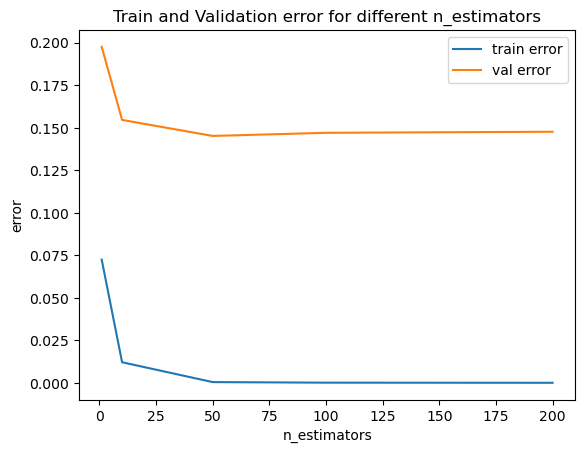

In [1940]:
# number of trees to use in the ensemble
n_estimators = [1, 10, 50, 100,200]

train_errors = []
val_errors = []

for n in n_estimators: 

     RF = RandomForestClassifier( 
                     n_estimators=n, # number of trees
                     #max_depth=10, 
                     #min_samples_split=5,  # Minimum samples required to split
                     random_state=seed)

     RF.fit(X_train, y_train)

     # Compute the training  error rates
     train_err = (y_train!= RF.predict(X_train)).mean()
     train_errors.append(train_err)

     # Compute the validation error rates
     val_err = (y_val!= RF.predict(X_val)).mean()
     val_errors.append(val_err)

# Plot the resulting performance as a function of n estimate
plt.plot(n_estimators , train_errors,  label = 'train error');
plt.plot(n_estimators , val_errors,    label = 'val error');

plt.xlabel('n_estimators')
plt.ylabel('error')
plt.title('Train and Validation error for different n_estimators')
plt.legend()
plt.show()

In [1941]:
# We can see that the fit of the random forest models (given multiple ensemble members) a single tree

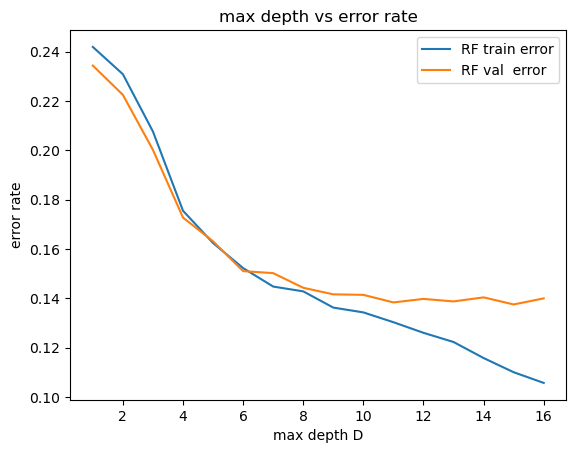

In [1942]:
RF_train_err_d = []
RF_val_err_d = []

depth = list(range(1, 17))

for d in depth:
    learner = RandomForestClassifier(
    max_depth=d,  # Restrict depth
    random_state=seed)
    
    learner.fit(X_train,y_train);

    # Compute the training  error rates
    train_err = (y_train!= learner.predict(X_train)).mean()
    RF_train_err_d.append(train_err)

    # Compute the validation error rates
    val_err = (y_val!= learner.predict(X_val)).mean()
    RF_val_err_d.append(val_err)

# Plot the resulting performance as a function of depth d
plt.plot(depth , RF_train_err_d,  label = 'RF train error');
plt.plot(depth , RF_val_err_d,    label = 'RF val  error');

plt.title("max depth vs error rate");
plt.xlabel("max depth D");
plt.ylabel("error rate");
plt.legend();

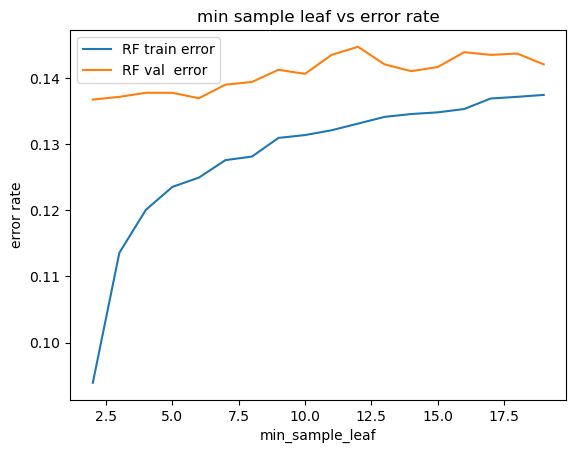

In [1943]:
RF_train_err_msl = []
RF_val_err_msl = []
min_sample_leaf =  list(range(2, 20))

# creating values
# for i in range(1,6): 
#     min_sample_leaf.append(2**i)
    
for msl in min_sample_leaf: 
    
    learner = RandomForestClassifier(
    #max_depth=10,  # Restrict depth
    min_samples_leaf=msl,  
    random_state=seed)
    
    learner.fit(X_train,y_train);

    # Compute the training  error rates
    train_err = (y_train!= learner.predict(X_train)).mean()
    RF_train_err_msl.append(train_err)

    # Compute the validation error rates
    val_err = (y_val!= learner.predict(X_val)).mean()
    RF_val_err_msl.append(val_err)

# Plot the resulting performance as a function of min sample leaf
plt.plot(min_sample_leaf , RF_train_err_msl,  label = 'RF train error');
plt.plot(min_sample_leaf , RF_val_err_msl,    label = 'RF val  error');
#plt.xscale('log', base=2)

plt.title("min sample leaf vs error rate");
plt.xlabel("min_sample_leaf");
plt.ylabel("error rate");
plt.legend();

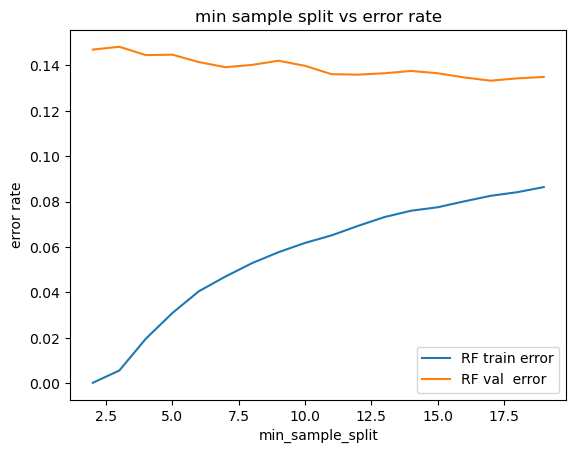

In [1944]:
RF_train_err_mss = []
RF_val_err_mss = []
min_sample_split =  list(range(2, 20))
    
for mss in min_sample_split: 
    
    learner = RandomForestClassifier(
    #max_depth=10,  # Restrict depth
    min_samples_split=mss,  
    random_state=seed)
    
    learner.fit(X_train,y_train);

    # Compute the training  error rates
    train_err = (y_train!= learner.predict(X_train)).mean()
    RF_train_err_mss.append(train_err)

    # Compute the validation error rates
    val_err = (y_val!= learner.predict(X_val)).mean()
    RF_val_err_mss.append(val_err)

# Plot the resulting performance as a function of min sample leaf
plt.plot(min_sample_split , RF_train_err_mss,  label = 'RF train error');
plt.plot(min_sample_split , RF_val_err_mss,    label = 'RF val  error');
#plt.xscale('log', base=2)

plt.title("min sample split vs error rate");
plt.xlabel("min_sample_split");
plt.ylabel("error rate");
plt.legend();

In [855]:
train_err = []
val_err = []

max_f =  ['sqrt', 'log2', 0.25, 0.5, 0.75]

for mf in max_f:
    learner = RandomForestClassifier(
    max_features=mf,   
    random_state=seed)
    
    learner.fit(X_train,y_train);

    # Compute the training  error rates
    train_err = (y_train!= learner.predict(X_train)).mean()
    print("train err for ", mf, " : ", train_err)

    # Compute the validation error rates
    val_err = (y_val!= learner.predict(X_val)).mean()
    print("val err for ", mf, " : ", val_err)

train err for  sqrt  :  0.00014735678762202984
val err for  sqrt  :  0.13854822671528008
train err for  log2  :  0.00011051759071652238
val err for  log2  :  0.14385150812064965
train err for  0.25  :  0.00014735678762202984
val err for  0.25  :  0.13722240636393768
train err for  0.5  :  0.0001841959845275373
val err for  0.5  :  0.13821677162744447
train err for  0.75  :  0.00014735678762202984
val err for  0.75  :  0.13622804110043088


In [858]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# param_grid = {
#     'n_estimators': [100,200],
#     'max_depth': [7,10,14],
#     'min_samples_split': [6,9],
#     'min_samples_leaf': [5,10,12]
# }

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2',0.25, 0.5, 0.75],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,       # Number of cross-validation folds
    random_state=42,
    n_jobs=-1   # Use all available cores
)
random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 0.25,
                                                         0.5, 0.75],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42)

In [446]:
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 15}
Best score: 0.8603058300948332


## optimal model

In [2076]:
# learner with tuned hyperparameters (from graphs)
#learner = RandomForestClassifier(random_state=seed, max_depth= 14, min_samples_leaf=12, min_samples_split = 6, n_estimators = 200, max_features=0.75)

# learner with random grid search result
#learner = RandomForestClassifier(random_state=seed, max_depth= 15, min_samples_leaf=1, min_samples_split = 5, n_estimators = 100 ,max_features=0.5)

learner = RandomForestClassifier(random_state=seed, max_depth= 15, n_estimators = 200 ,max_features=0.5)
learner.fit(X_train, y_train)

#  training  error rate
train_err = (y_train!= learner.predict(X_train)).mean()
print(f"\nTraining error rate : ", train_err)

# validation error rate
val_err = (y_val!= learner.predict(X_val)).mean()
print(f"\nvalidation error rate : ", val_err)

# test error rate
test_err = (y_test!= learner.predict(X_test)).mean()
print(f"\ntest error rate : ", test_err)


Training error rate :  0.08483884954473189

validation error rate :  0.136949846468782

test error rate :  0.1342669369203366


## Cross Validation

In [2078]:
# perform cross val

## Gradient Boost

In [2081]:
# https://medium.com/@24littledino/xgboost-classification-in-python-f29cc2c50a9b
import xgboost as xgb

model = xgb.XGBClassifier(
    #max_depthj =5,
    #objective='binary:logistic',  # For binary classification
    #eval_metric='logloss',        # Evaluation metric
    #use_label_encoder=False,      # Avoid label encoder warning
    random_state=seed)

# Fit the model to the training data
model.fit(X_train, y_train)

# Compute the training  error rates
train_err = (y_train!= model.predict(X_train)).mean()
print(f"\nTraining error rate : ", train_err)

# Compute the validation error rates
val_err = (y_val!= model.predict(X_val)).mean()
print(f"\nvalidation error rate : ", val_err)

# Compute the tes error rates
test_err = (y_test!= model.predict(X_test)).mean()
print(f"\ntest error rate : ", test_err)


Training error rate :  0.09860528978176036

validation error rate :  0.12835209825997954

test error rate :  0.12843191450156624


In [2083]:
# Gradient boosting models generally outperform random forests
# due to their ability to focus on misclassified samples

In [2085]:
#model?

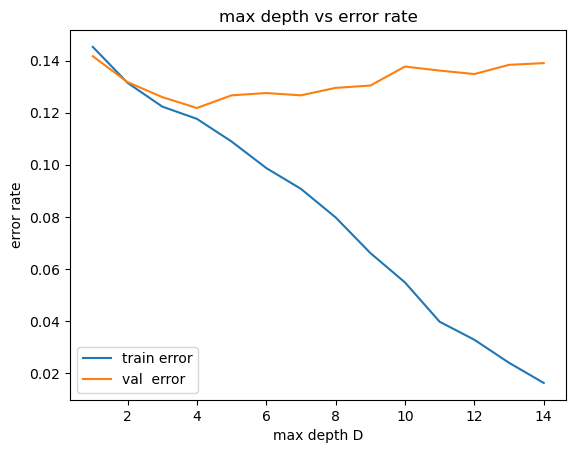

In [1160]:
train_err_d = []
val_err_d = []

depth = list(range(1, 15))

for d in depth:
    learner = xgb.XGBClassifier(max_depth = d,
                      random_state=seed)
    
    learner.fit(X_train,y_train);

    # Compute the training  error rates
    train_err = (y_train!= learner.predict(X_train)).mean()
    train_err_d.append(train_err)

    # Compute the validation error rates
    val_err = (y_val!= learner.predict(X_val)).mean()
    val_err_d.append(val_err)

# Plot the resulting performance as a function of depth d
plt.plot(depth , train_err_d,  label = 'train error');
plt.plot(depth , val_err_d,    label = 'val  error');

plt.title("max depth vs error rate");
plt.xlabel("max depth D");
plt.ylabel("error rate");
plt.legend();

In [2087]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


# Compute the training  error rates
train_err = (y_train!= model.predict(X_train)).mean()
print(f"\nTraining error rate : ", train_err)

# Compute the validation error rates
val_err = (y_val!= model.predict(X_val)).mean()
print(f"\nvalidation error rate : ", val_err)

# Compute the tes error rates
test_err = (y_test!= model.predict(X_test)).mean()
print(f"\ntest error rate : ", test_err)

0
0
0

Training error rate :  0.14583032230091053

validation error rate :  0.15516888433981577

test error rate :  0.14728825010748725
